# <font color='navy'> <center>Time Series Analysis – Furniture Sales Forecasting

### <center> By Viha Sharma

# TABLE OF CONTENTS:

1. Import dependencies and load dataset


2. Exploratory Data Analysis:
    - Dataset Overview
    - Generating a Report for entire dataset
    - Checking for missing values and row repetitions
    - Determining correlation of features - pairplot and heatmap
    - Performing Univariate analysis for relevant columns
    - Checking skewness of data
    
    
3. Data cleaning:
    - Selecting relevant columns for univariate time series analysis
    - Missing Value Treament
    - Treating Row repetitions
    - Setting Order Date as column index
    - Performing resampling (weekly and monthly)
    - Visualisations
    
    
4. Analysing Time Series Components - Trend, Seasonality, Irregularity


5. Checking stationarity of data


6. Correlogram plot - ACF and PACF graphs to determine order of non-seasonality components


7. Model Building and Evaluation:  
    (a) ARMA /ARIMA  
    (b) SARIMA   
    (c) SARIMAX 
 
 
8. Model Comparison and Conclusions

In [1]:
sb.set_theme(style='darkgrid')

NameError: name 'sb' is not defined

In [2]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport

from statsmodels.tsa.api import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA

import ipywidgets
from ipywidgets import interactive
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
# Load dataset
furniture_df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls', parse_dates=['Order Date']);furniture_df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
print('Starting Date:',furniture_df['Order Date'].min())
print('Stop Date:',furniture_df['Order Date'].max())

Starting Date: 2014-01-03 00:00:00
Stop Date: 2017-12-30 00:00:00


#  <center> I. Exploratory Data Analysis

In [5]:
def dataset_overview(df):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print('\033[1;3m1. Number of records:\033[0m',df.shape[0])
    print(' — — — — -')
    print('\033[1;3m2. Number of features:\033[0m', df.shape[1])
    print(' — — — — -')
    print('\033[1;3m3. Basic overview:\033[0m')
    print(df.info())
    print(' — — — — -')
    print('\033[1;3m4. Statistical summary:\033[0m\n',df.describe())
    print(' — — — — -')
    print('\033[1;3m5. Data types:\033[0m\n', df.dtypes)
    print(' — — — — -')
    print('\033[1;3m6. First 5 records:\033[0m\n',df.head())
    print(' — — — — -')
    print('\033[1;3m7. Last 5 records:\033[0m\n', df.tail())

In [6]:
dataset_overview(furniture_df)

INITIAL DATASET OVERVIEW
1. Number of records: 9994
 — — — — -
2. Number of features: 21
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Prod

# <font color='grey'> Generating a Summary Report

In [7]:
profile = ProfileReport(furniture_df); profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
furniture_df = furniture_df.drop(['Row ID', 'Order ID', 'Customer ID','Customer Name','Product Name' ,'City' ,'Product ID' ,'Ship Date', 'Postal Code', ], axis=1)

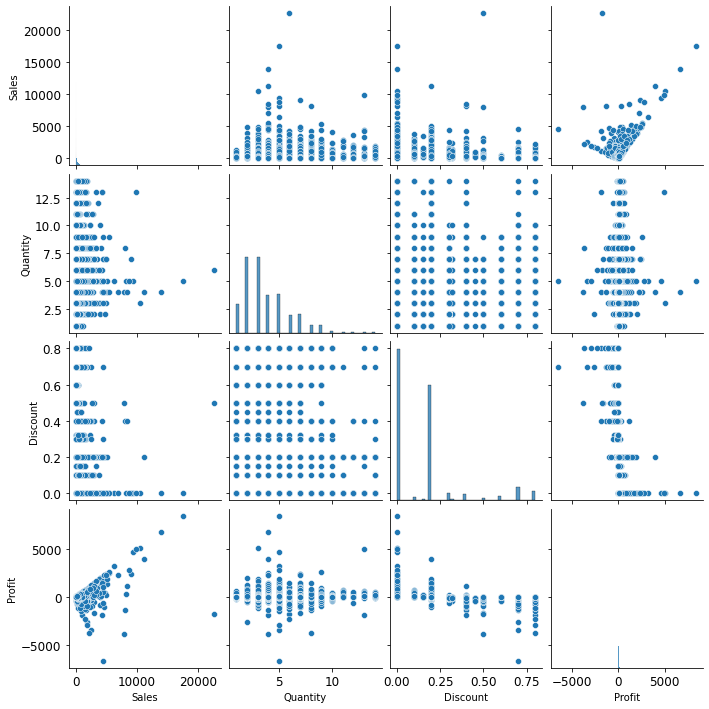

In [9]:
sb.pairplot(furniture_df);

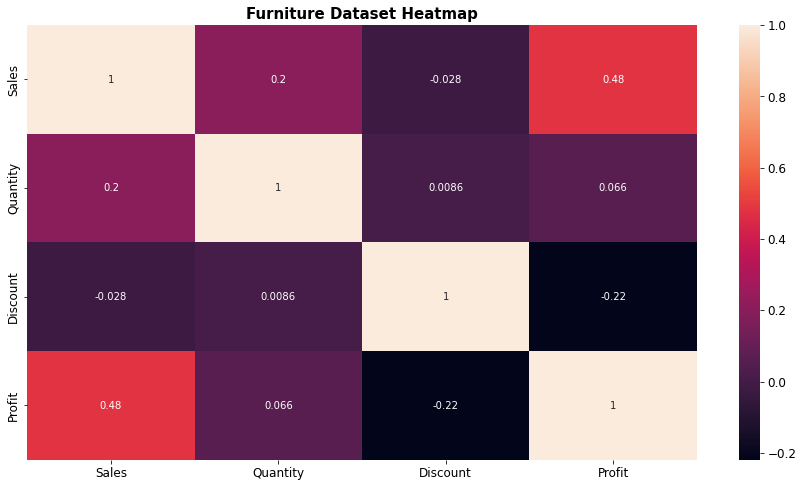

In [10]:
plt.figure(figsize=(15,8))
sb.heatmap(furniture_df.corr(), annot = True)
plt.title('Furniture Dataset Heatmap', fontsize = 15, fontweight='bold')
plt.show()

# <font color='grey'> Extracting Numerical and Non-numerical columns

In [11]:
numerical = [x for x in furniture_df.columns if furniture_df[x].dtype != 'object']
obj = [x for x in furniture_df.columns if furniture_df[x].dtype == 'object']

In [12]:
print('Numerical Columns:\n', numerical)

Numerical Columns:
 ['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit']


In [13]:
print('Non-numerical Columns:\n', obj)

Non-numerical Columns:
 ['Ship Mode', 'Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category']


# <font color='grey'> Data Visualisation - Univariate Analysis

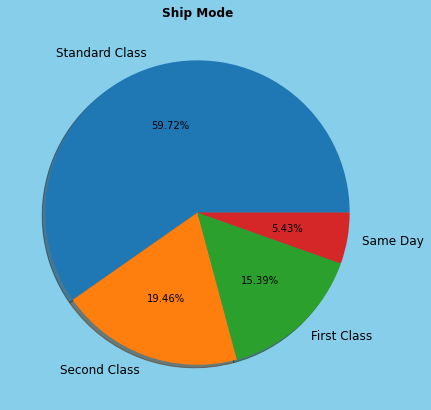

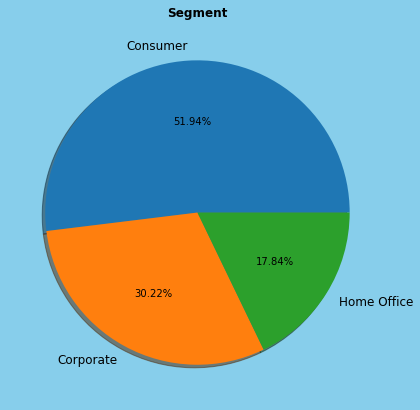

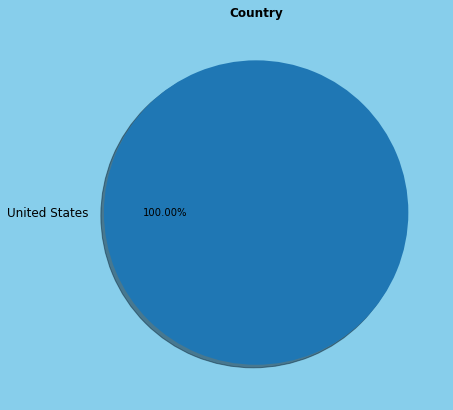

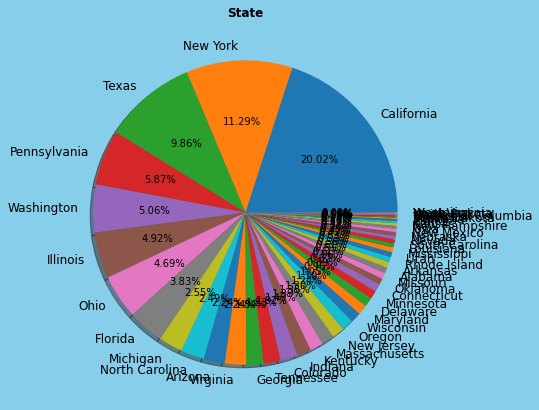

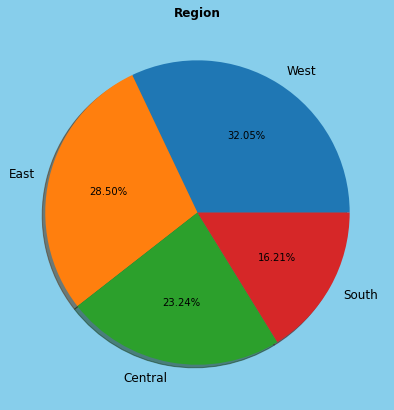

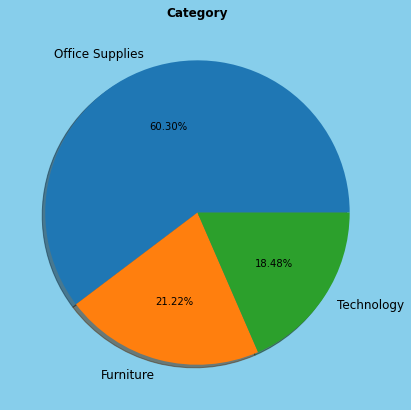

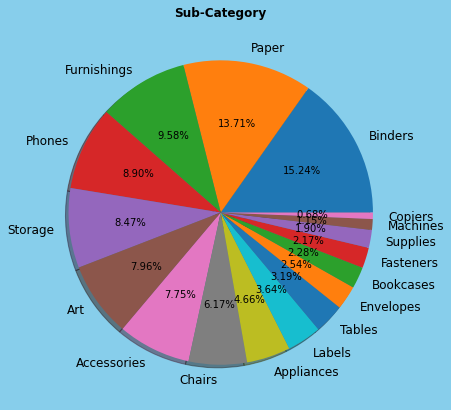

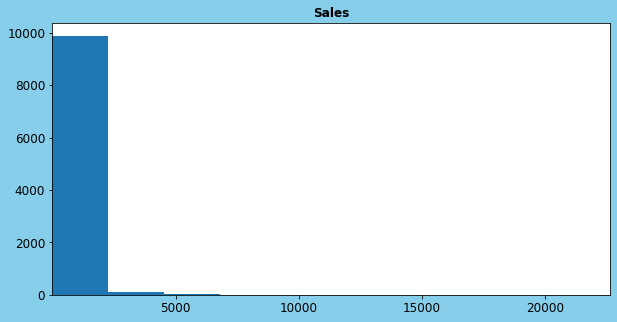

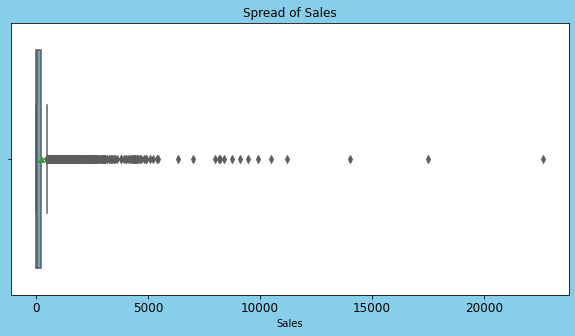

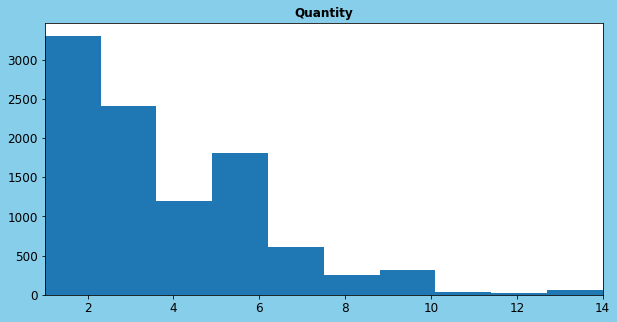

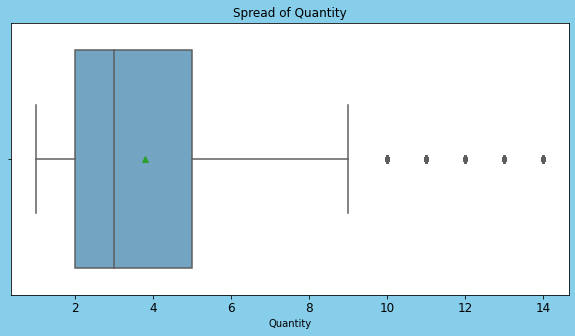

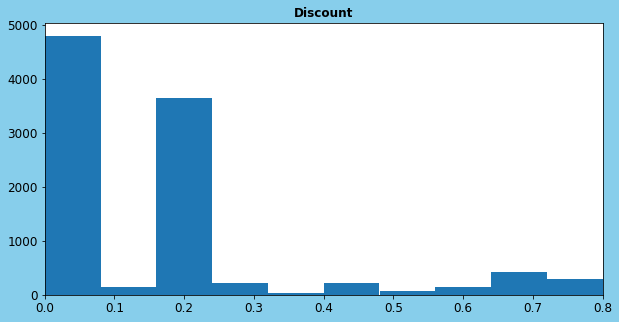

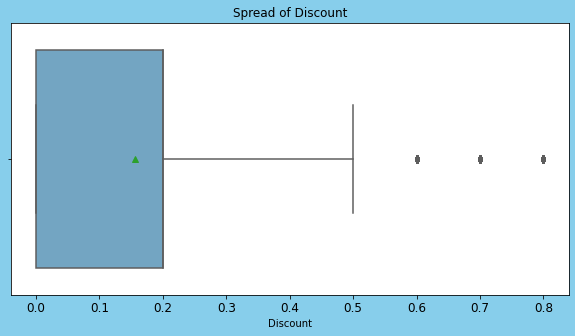

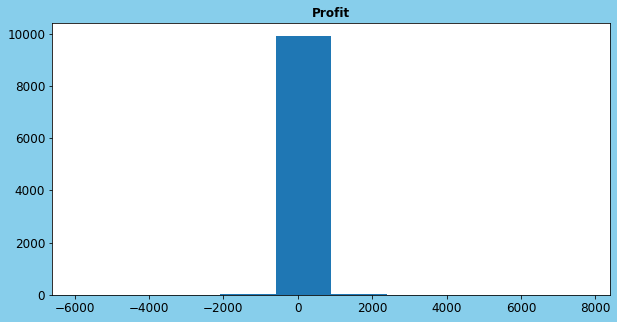

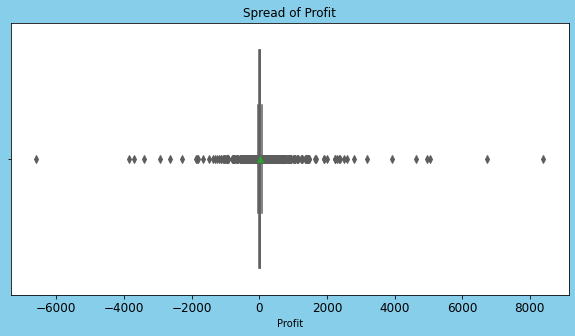

In [14]:
furniture_plot = furniture_df.drop(['Order Date'], axis=1)
for i in furniture_plot:    
    if i in numerical:
        plt.subplots(figsize=(10,5), facecolor='skyblue')
        plt.title(i, fontweight='bold')
        plt.hist(furniture_df[i])
        plt.xlim(furniture_df[i].min(), furniture_df[i].max())
        plt.subplots(figsize=(10,5), facecolor='skyblue')
        sb.boxplot(furniture_df[i], palette='PuBuGn', showmeans=True,)
        plt.title(f'Spread of {i}')
    elif i in obj:
        plt.subplots(figsize=(15,7), facecolor='skyblue')
        plt.title(i, fontweight='bold')
        plt.pie(furniture_df[i].value_counts(), labels = furniture_df[i].value_counts().index, autopct = '%.2f%%', shadow=True)

# Inferences:

<div class='alert alert-warning'>

1. There are many outliers in profit, quantity, discount and sales.
2. Binders have the largest proportion in the sub-category feature
3.Office-Supplies is the most common category in our dataset
4. The company only deals in USA with the highest number of orders coming from California. 
5. The consumer segment has the highest demand 

</div>

In [15]:
furniture_df.skew()
# All numerical columns are not normally distributed. 

Sales       12.972752
Quantity     1.278545
Discount     1.684295
Profit       7.561432
dtype: float64

# <center> II. Data Preprocessing 
    
Dataset is specific to USA
    
1. Removing unnecessary columns
2. Check missing values
3. Aggregate sales by date
4. The west region has greatest demand for company, while south has the smallest customer base.
5. 

# <font color='grey'>Selecting Relevant features

In [16]:
df_sales = furniture_df.loc[:,['Order Date', 'Sales']]; 
df_sales.sort_values(by='Order Date', inplace=True)
df_sales

Order Date    Sales
7980 2014-01-03   16.448
739  2014-01-04   11.784
740  2014-01-04  272.736
741  2014-01-04    3.540
1759 2014-01-05   19.536
...         ...      ...
5091 2017-12-30    3.024
908  2017-12-30   52.776
907  2017-12-30   90.930
1296 2017-12-30   13.904
906  2017-12-30  323.136

[9994 rows x 2 columns]

# <font color='grey'>Missing Value Treatment

In [17]:
#No null values
df_sales.isnull().sum()

Order Date    0
Sales         0
dtype: int64

# <font color='grey'> Replacing Duplicate columns

In [18]:
# Checking for Duplicate values

df_sales[df_sales.duplicated(subset=['Order Date'])]

Order Date     Sales
740  2014-01-04   272.736
741  2014-01-04     3.540
7474 2014-01-06  2573.820
7475 2014-01-06   609.980
7180 2014-01-06    12.780
...         ...       ...
5091 2017-12-30     3.024
908  2017-12-30    52.776
907  2017-12-30    90.930
1296 2017-12-30    13.904
906  2017-12-30   323.136

[8757 rows x 2 columns]

In [19]:
# taking the sum of duplicated values 

df_sales = pd.DataFrame(df_sales.groupby(['Order Date'])['Sales'].sum()); df_sales

Sales
Order Date           
2014-01-03    16.4480
2014-01-04   288.0600
2014-01-05    19.5360
2014-01-06  4407.1000
2014-01-07    87.1580
...               ...
2017-12-26   814.5940
2017-12-27   177.6360
2017-12-28  1657.3508
2017-12-29  2915.5340
2017-12-30   713.7900

[1237 rows x 1 columns]

In [20]:
dataset_overview(df_sales)

INITIAL DATASET OVERVIEW
1. Number of records: 1237
 — — — — -
2. Number of features: 1
 — — — — -
3. Basic overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2014-01-03 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1237 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB
None
 — — — — -
4. Statistical summary:
               Sales
count   1237.000000
mean    1857.074261
std     2305.538776
min        2.025000
25%      377.736000
50%     1063.185000
75%     2395.786000
max    28106.716000
 — — — — -
5. Data types:
 Sales    float64
dtype: object
 — — — — -
6. First 5 records:
                Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06  4407.100
2014-01-07    87.158
 — — — — -
7. Last 5 records:
                 Sales
Order Date           
2017-12-26   814.5940
2017-12-27   177.6360
2017-12-28  1657.3508
2017-12

# Indexing with Time Series Data

In [22]:
df_sales.skew() 
# Sales: Highly skewed feature with many outliers on the right. 

Sales    3.235466
dtype: float64

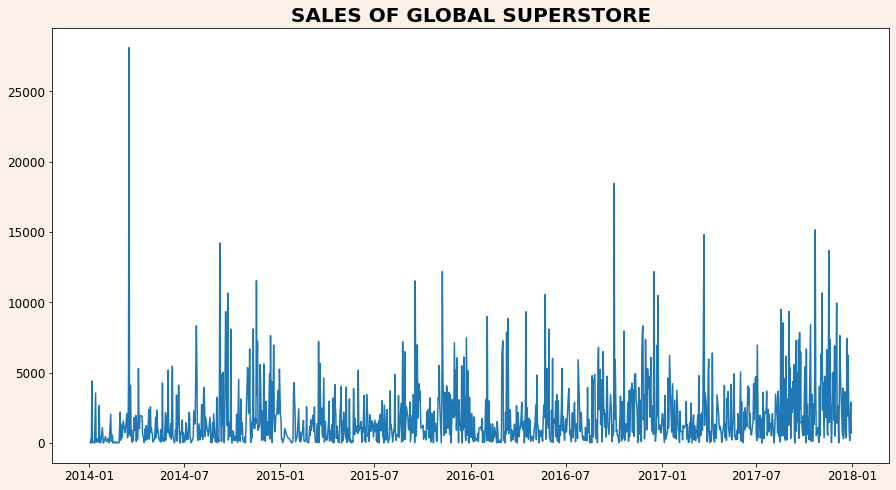

In [23]:
plt.figure(figsize=(15,8), facecolor='linen')
plt.plot(df_sales['Sales'])
plt.title('SALES OF GLOBAL SUPERSTORE', fontweight='bold', size=20)
plt.show()

# Resampling

Changing the time frequency to monthly to get a clearer visual

In [24]:
# Resampling data Weekly

df_sales_w = df_sales['Sales'].resample('W').mean()

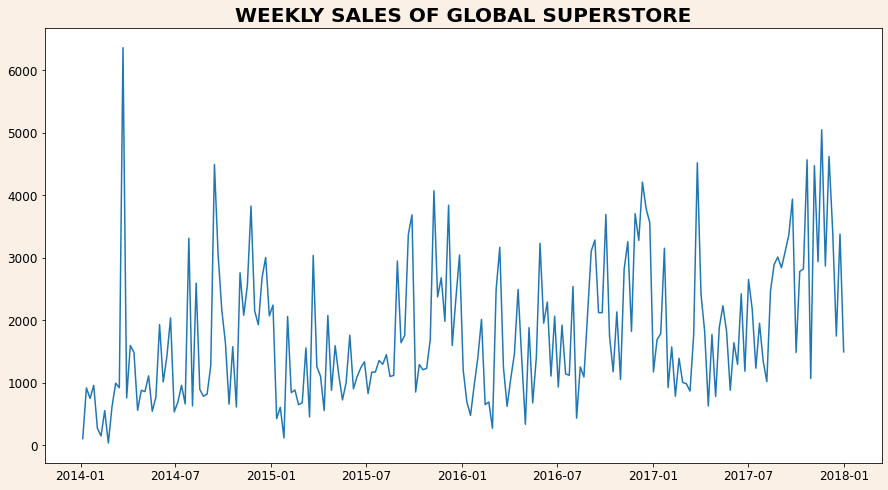

In [25]:
plt.figure(figsize=(15,8), facecolor='linen')
plt.plot(df_sales_w)
plt.title('WEEKLY SALES OF GLOBAL SUPERSTORE', fontweight='bold', size=20)
plt.show()

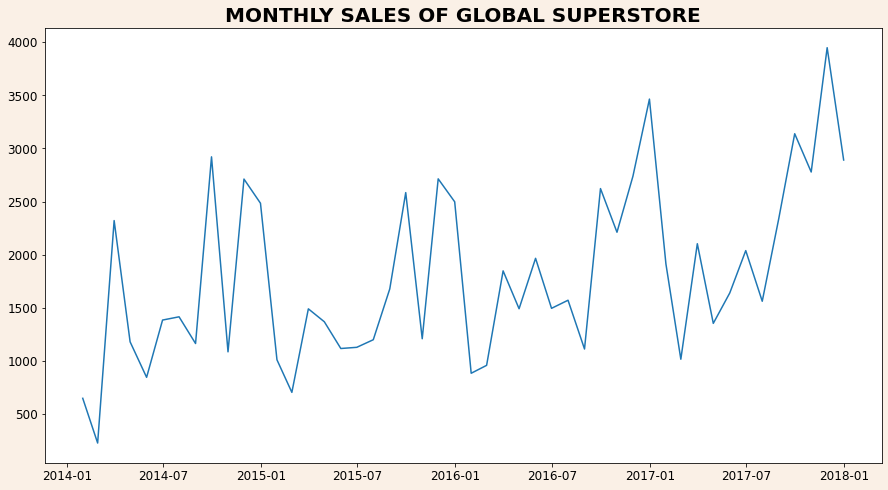

In [26]:
# Resampling data Monthly

df_sales_m = df_sales['Sales'].resample('m').mean()

plt.figure(figsize=(15,8), facecolor='linen')
plt.plot(df_sales_m)
plt.title('MONTHLY SALES OF GLOBAL SUPERSTORE', fontweight='bold', size=20)
plt.show()

The data is now ready for time series analysis.

# ANALYSING TIME SERIES COMPONENTS

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
def tsa_comp(df):
    decomp = seasonal_decompose(df, period=12, model='additive')

    d_trend = decomp.trend
    d_seasonal = decomp.seasonal
    d_resid = decomp.resid
    
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,8), facecolor='linen')
    plt.suptitle('TIME SERIES COMPONENT ANALYSIS', fontweight='bold', size=20)
    ax1.plot(df, label='Actual Sales')
    ax2.plot(d_trend, label='Trend', c='green')
    ax3.plot(d_seasonal, label='Seasonal', c='pink')
    ax4.plot(d_resid, label='Irregularity', c='orange')
    fig.legend();

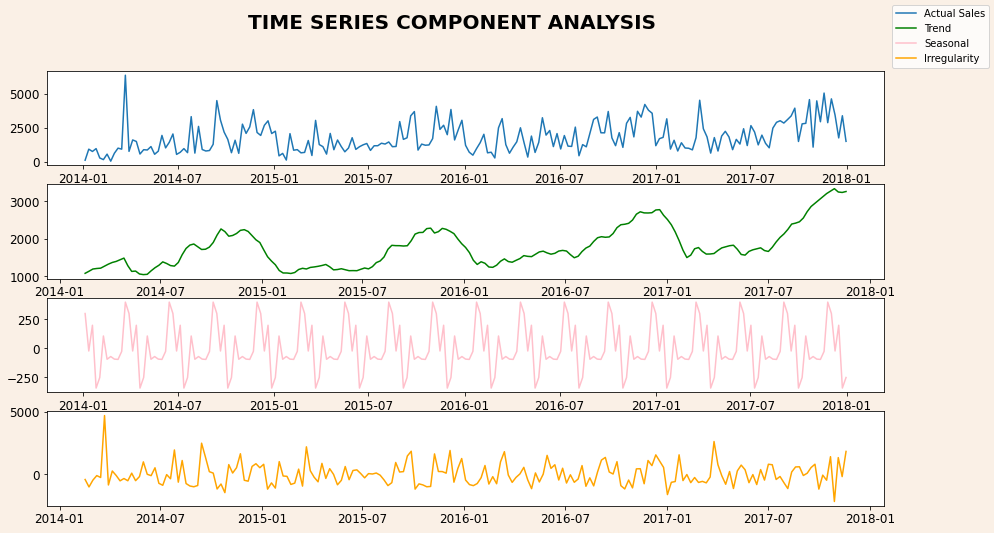

In [33]:
tsa_comp(df_sales_w)

# Inference:

From the weekly resampled data, we can see there is a positive trend and a seasonal component

---

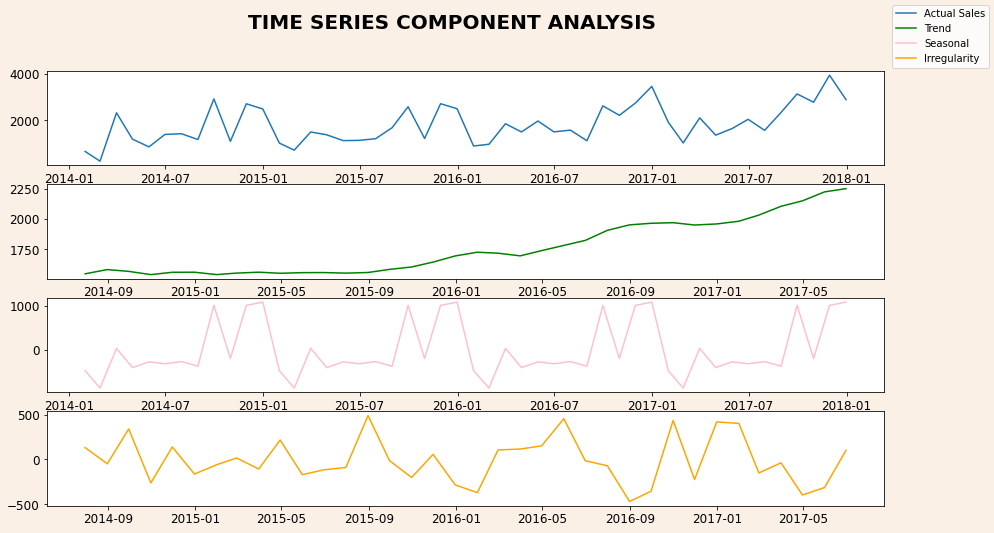

In [34]:
tsa_comp(df_sales_m)

### Inference: 
From the monthly resampled data, we can clearly see a positive trend and a seasonal component in our data

# Checking stationarity of data

In [35]:
from statsmodels.tsa.api import adfuller

In [36]:
def check_statonary(df_sales_m):
    p_value = adfuller(df_sales_m)[1]
    print('P value is:', np.round(p_value,3))
    if p_value <0.05:
        print('Data is stationary')
    else:
        print('Data is not stationary, perform differencing technique')

In [37]:
check_statonary(df_sales_w)

P value is: 0.0
Data is stationary


# Plotting ACF and PACF graphs 
Determine p and q values

In [38]:
def acf_pacf(lags):
    fig, ax = plt.subplots(1,2, figsize=(15,8), facecolor='linen')
    plot_acf(df_sales_m,lags=lags, ax=ax[0])
    plot_pacf(df_sales_m, lags=lags, ax=ax[1])

In [39]:
#Skipping lag=0 as this indicates the correlation of the time series with itself
interactive(acf_pacf,lags =(1,20,1))

interactive(children=(IntSlider(value=10, description='lags', max=20, min=1), Output()), _dom_classes=('widget…

# Inferences

<div class='alert alert-warning'> 

As we are taking monthly data, we will consider lags=12. 


From the PACF and ACF graphs we can conclude the following:
    
AR(p) =  [0,2]


MA(q) = [0,3]
    
</div>

In [40]:
model1 = auto_arima(df_sales_w, trace=True, seasonal=False)  
model1.summary()

# Gets order of (0,1,1) with AIC = 3482.423, BIC = 3489.098

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3575.789, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3513.390, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3483.615, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3573.797, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3483.911, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3485.400, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3487.322, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3482.423, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3483.111, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3483.555, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3511.422, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3486.072, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.097 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1739.211
Date:                Tue, 13 Dec 2022   AIC                           3482.423
Time:                        20:23:30   BIC                           3489.098
Sample:                    01-05-2014   HQIC                          3485.122
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8219      0.041    -20.202      0.000      -0.902      -0.742
sigma2      1.068e+06   6.02e+04     17.732      0.000     9.5e+05    1.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               171.42
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             1.16
Prob(H) (two-sided):                  0.68   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Splitting data into Train and Test

In [41]:
row_len = int(len(df_sales_m)*.7)

train = df_sales_m.iloc[:row_len]
test = df_sales_m.iloc[row_len:]

In [42]:
print('Records in Train set: ',len(train))
print('Records in Test set: ',len(test))

Records in Train set:  33
Records in Test set:  15


# ARMA MODEL

In [43]:
# creating model and predicting train dataset

In [44]:
list=[]
for p in range(5):
    for q in range(3):
        list.append((p,0,q))
        
models=[]
for i in list:
    m=ARIMA(train,order=i).fit()   
    models.append(m)

In [45]:
models=[]
for i in list:
    m=ARIMA(train,order=i).fit()   
    models.append(m)

In [46]:
from sklearn.metrics import mean_squared_error #for calculating errors.

aic = [] 
bic = []  
MSE = [] 
RMSE = [] 

for i in models:
    aic.append(i.aic) #appending aic
    bic.append(i.bic) #appending bic 
    forecast = i.fittedvalues #forecasting predictions
    mse = mean_squared_error(train, forecast) #calculating mse
    rmse= mean_squared_error(train, forecast,squared= False)#calculating rmse
    MSE.append(mse) #appending mse
    RMSE.append(rmse) #appending rmse

In [47]:
f= pd.DataFrame({'AIC':aic,'BIC':bic,'MSE':MSE,'RMSE':RMSE},index = list) 
f

AIC         BIC            MSE        RMSE
(0, 0, 0)  529.053313  532.046328  475835.450244  689.808271
(0, 0, 1)  531.027867  535.517390  475479.898416  689.550505
(0, 0, 2)  532.743815  538.729845  472027.224767  687.042375
(1, 0, 0)  531.040257  535.529780  475539.090810  689.593424
(1, 0, 1)  533.009035  538.995066  475229.851847  689.369169
(1, 0, 2)  534.637491  542.120029  470447.187775  685.891528
(2, 0, 0)  532.760248  538.746278  472160.365570  687.139262
(2, 0, 1)  534.465459  541.947997  468538.936912  684.499041
(2, 0, 2)  531.743063  540.722108  401374.506201  633.541243
(3, 0, 0)  534.095521  541.578059  464007.427896  681.180907
(3, 0, 1)  536.037772  545.016817  463312.515088  680.670636
(3, 0, 2)  533.538781  544.014334  398497.593980  631.266658
(4, 0, 0)  535.864179  544.843225  461168.126389  679.093606
(4, 0, 1)  534.116417  544.591970  420827.475309  648.712167
(4, 0, 2)  534.815329  546.787390  399640.150880  632.170982

In [48]:
## Determing least RMSE values to get order of ARMA
value = f['RMSE'].sort_values() 
value

(3, 0, 2)    631.266658
(4, 0, 2)    632.170982
(2, 0, 2)    633.541243
(4, 0, 1)    648.712167
(4, 0, 0)    679.093606
(3, 0, 1)    680.670636
(3, 0, 0)    681.180907
(2, 0, 1)    684.499041
(1, 0, 2)    685.891528
(0, 0, 2)    687.042375
(2, 0, 0)    687.139262
(1, 0, 1)    689.369169
(0, 0, 1)    689.550505
(1, 0, 0)    689.593424
(0, 0, 0)    689.808271
Name: RMSE, dtype: float64

In [49]:
# Therefore, for p=3 and q=2, we get the lowest error term (RMSE) in the ARMA model

In [50]:
p=3; q=2
arma_model = ARIMA(train,order=(p,0,q)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -259.769
Date:                Tue, 13 Dec 2022   AIC                            533.539
Time:                        20:23:32   BIC                            544.014
Sample:                    01-31-2014   HQIC                           537.063
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.8024    193.749      7.978      0.000    1166.062    1925.542
ar.L1         -0.9459      0.461     -2.053      0.040      -1.849      -0.043
ar.L2         -0.9182      0.416     -2.208      0.0

# ARMA MODEL REPORT

In [51]:
arma_params = '(3,0,2)'
arma_aic = arma_model.aic
arma_bic = arma_model.bic
arma_mse = mean_squared_error(train, arma_model.fittedvalues)
arma_rmse = mean_squared_error(train, arma_model.fittedvalues, squared=False)

print('\033[1;3mOVERVIEW OF OPTIMAL ARMA MODEL\033[0m')
print()
print('AIC:',arma_aic)
print('BIC:',arma_bic)
print('MSE:',arma_mse)
print('RMSE:',arma_rmse)

OVERVIEW OF OPTIMAL ARMA MODEL

AIC: 533.53878134655
BIC: 544.0143342768154
MSE: 398497.59398000274
RMSE: 631.2666583782187


In [52]:
def arma(p,q,d):
    arima_model = ARIMA(train,order=(p,d,q)).fit()
    predicted = arima_model.fittedvalues
    
    plt.figure(figsize=(15,8), facecolor='linen')
    plt.title(f'ARMA MODEL TRAIN DATA - PREDICTION FOR p={p}, q={q}', fontweight='bold', size=20)
    plt.plot(train, c='orange')
    plt.plot(predicted, c='black')

In [53]:
interactive(arma, p=(0,10,1), q=(0,10,1), d=[0,1,2])

interactive(children=(IntSlider(value=5, description='p', max=10), IntSlider(value=5, description='q', max=10)…

# Forecasting test dataset

In [54]:
# future predictions for arima model 
start = len(train) 
end = len(train) + len(test) - 1

arma_forecasts = arma_model.predict(start,end,typ='levels')
print(arma_forecasts)

2016-10-31    1223.375284
2016-11-30    1540.125101
2016-12-31    1932.919876
2017-01-31    1159.173358
2017-02-28    1555.593223
2017-03-31    1922.381482
2017-04-30    1149.825361
2017-05-31    1575.343680
2017-06-30    1911.444304
2017-07-31    1141.290818
2017-08-31    1595.031914
2017-09-30    1899.787293
2017-10-31    1133.559063
2017-11-30    1614.616823
2017-12-31    1887.433551
Freq: M, Name: predicted_mean, dtype: float64


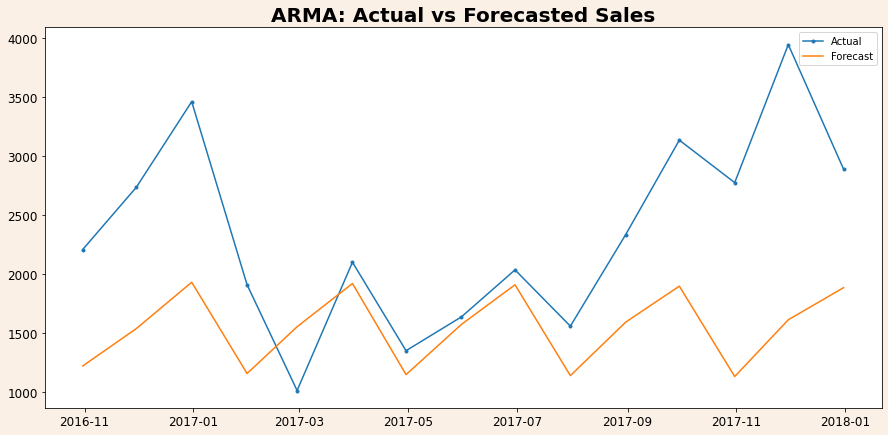

In [58]:
forecast_arima = arma_model.forecast(len(test))

plt.figure(figsize=(15,7), facecolor='linen')
plt.title('ARMA: Actual vs Forecasted Sales', fontweight='bold', size=20)
plt.plot(test,marker = '.', label = 'Actual')
plt.plot(arma_forecasts, label = 'Forecast' )
plt.legend()
plt.show()

In [59]:
# Observation: ARMA Model is not able to capture trend or seasonality well. 

# SARIMA MODEL

In [60]:
sarima_model = auto_arima(train, seasonal=True, trace=True)
sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=536.302, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=529.053, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=531.047, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=531.028, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=586.299, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=533.244, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.151 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:                        SARIMAX   Log Likelihood                -262.527
Date:                Tue, 13 Dec 2022   AIC                            529.053
Time:                        20:24:25   BIC                            532.046
Sample:                    01-31-2014   HQIC                           530.060
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1545.7720    133.220     11.603      0.000    1284.666    1806.878
sigma2      4.758e+05   1.64e+05      2.895      0.004    1.54e+05    7.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.89   Prob(JB):                         0.36
Heteroskedasticity (H):               0.63   Skew:                             0.48
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
p=3; q=2; d=0
P=0;Q=2;D=0

seasonal_model = sm.tsa.statespace.SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,30)).fit()
seasonal_model.summary()
aic_sarima = seasonal_model.aic
bic_sarima = seasonal_model.bic

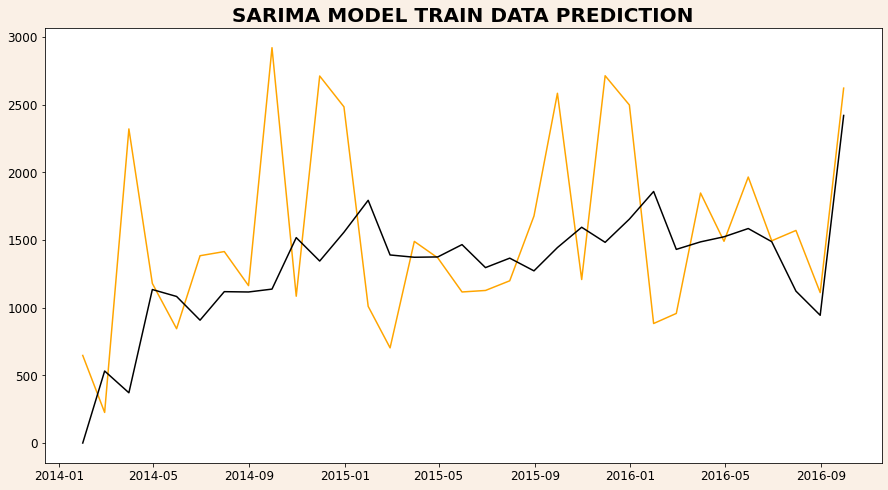

In [62]:
#predicting past data values

sarima_pred = seasonal_model.fittedvalues

plt.figure(figsize=(15,8), facecolor='linen')
plt.title(f'SARIMA MODEL TRAIN DATA PREDICTION', fontweight='bold', size=20)
plt.plot(train, c='orange')
plt.plot(sarima_pred, c='black')
plt.show()

In [64]:
# forecasting test data values

sarima_forecasts = seasonal_model.forecast(len(test))
sarima_forecasts

2016-10-31    1637.076795
2016-11-30    1414.882289
2016-12-31    1745.603546
2017-01-31    1788.513112
2017-02-28    1586.933514
2017-03-31    2807.024953
2017-04-30    1526.008339
2017-05-31    2651.772861
2017-06-30    2476.192864
2017-07-31    1475.321430
2017-08-31    1249.472567
2017-09-30    1792.421885
2017-10-31    1696.657244
2017-11-30    1525.659256
2017-12-31    1523.992411
Freq: M, Name: predicted_mean, dtype: float64

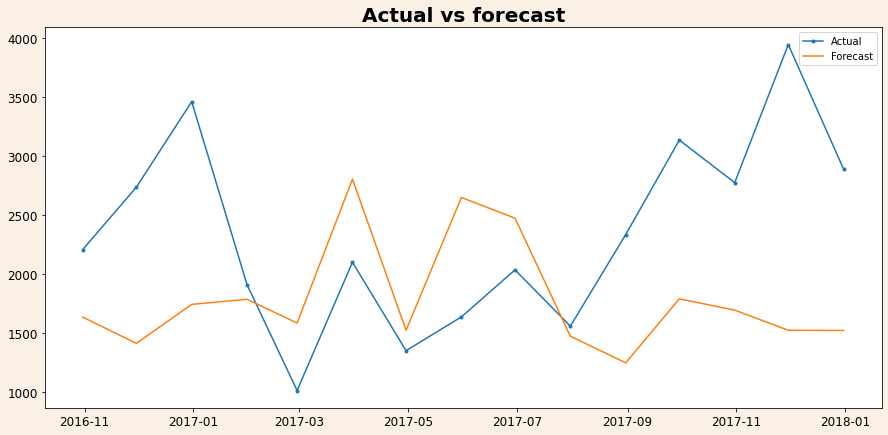

In [65]:
plt.figure(figsize=(15,7), facecolor='linen')
plt.title('Actual vs forecast', fontweight='bold', size=20)
plt.plot(test,marker = '.', label = 'Actual')
plt.plot(sarima_forecasts, label = 'Forecast' )
plt.legend()
plt.show()

In [67]:
# Calculating errors: 

mse_sarima = mean_squared_error(test, sarima_forecasts, squared=True)
rmse_sarima = mean_squared_error(test, sarima_forecasts, squared=False)

# SARIMA MODEL REPORT

In [68]:
print('\033[1;3mOVERVIEW OF OPTIMAL SARIMA MODEL\033[0m')
print()
print('AIC:',aic_sarima)
print('BIC:',bic_sarima)
print('MSE:',mse_sarima)
print('RMSE:',mse_sarima)

OVERVIEW OF OPTIMAL SARIMA MODEL

AIC: 543.7669878725326
BIC: 555.7390483642645
MSE: 1268555.5579554068
RMSE: 1268555.5579554068


# SARIMAX MODEL

In [69]:
sarimax_df = furniture_df.set_index('Order Date')
sarimax_df

Ship Mode    Segment        Country       State Region  \
Order Date                                                                
2016-11-08    Second Class   Consumer  United States    Kentucky  South   
2016-11-08    Second Class   Consumer  United States    Kentucky  South   
2016-06-12    Second Class  Corporate  United States  California   West   
2015-10-11  Standard Class   Consumer  United States     Florida  South   
2015-10-11  Standard Class   Consumer  United States     Florida  South   
...                    ...        ...            ...         ...    ...   
2014-01-21    Second Class   Consumer  United States     Florida  South   
2017-02-26  Standard Class   Consumer  United States  California   West   
2017-02-26  Standard Class   Consumer  United States  California   West   
2017-02-26  Standard Class   Consumer  United States  California   West   
2017-05-04    Second Class   Consumer  United States  California   West   

                   Category Sub-Category     Sales  Quantity  Discount  \
Order Date                                                               
2016-11-08        Furniture    Bookcases  261.9600         2      0.00   
2016-11-08        Furniture       Chairs  731.9400         3      0.00   
2016-06-12  Office Supplies       Labels   14.6200         2      0.00   
2015-10-11        Furniture       Tables  957.5775         5      0.45   
2015-10-11  Office Supplies      Storage   22.3680         2      0.20   
...                     ...          ...       ...       ...       ...   
2014-01-21        Furniture  Furnishings   25.2480         3      0.20   
2017-02-26        Furniture  Furnishings   91.9600         2      0.00   
2017-02-26       Technology       Phones  258.5760         2      0.20   
2017-02-26  Office Supplies        Paper   29.6000         4      0.00   
2017-05-04  Office Supplies   Appliances  243.1600         2      0.00   

              Profit  
Order Date            
2016-11-08   41.9136  
2016-11-08  219.5820  
2016-06-12    6.8714  
2015-10-11 -383.0310  
2015-10-11    2.5164  
...              ...  
2014-01-21    4.1028  
2017-02-26   15.6332  
2017-02-26   19.3932  
2017-02-26   13.3200  
2017-05-04   72.9480  

[9994 rows x 11 columns]

In [70]:
sarimax_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [71]:
sarimax_df1 = sarimax_df.groupby(['Order Date'])["Discount","Sales", 'Profit' ].sum()
sarimax_df1.head()

Discount     Sales     Profit
Order Date                               
2014-01-03       0.2    16.448     5.5512
2014-01-04       1.2   288.060   -65.9901
2014-01-05       0.2    19.536     4.8840
2014-01-06       0.0  4407.100  1358.0524
2014-01-07       1.4    87.158   -71.9621

In [72]:
sarimax_m = sarimax_df1.resample('m').mean()

In [73]:
sarimax_m.head()

Discount        Sales      Profit
Order Date                                   
2014-01-31  0.454545   647.131591  111.372305
2014-02-28  0.405000   225.994600   43.115420
2014-03-31  1.095833  2320.458708   20.780412
2014-04-30  0.618750  1178.972708  145.368133
2014-05-31  0.676786   844.581679   97.811057

In [74]:
sarimax_m.shape

(48, 3)

In [75]:
p=3; q=2; d=0
P=0;Q=2;D=0

In [76]:
rows = int(0.7*len(sarimax_m))
sarimax_train= sarimax_m.iloc[:rows]
sarimax_test = sarimax_m.iloc[rows:]
print("Train records = {}\nTest records = {}".format(len(sarimax_train),len(sarimax_test)))

Train records = 33
Test records = 15


In [77]:
#modelling

sarimax_model = SARIMAX(sarimax_train.Sales,order=(3,0,2),seasonal_order=(0,0,2,12),exog=sarimax_train.values).fit()

In [78]:
exog_train = sarimax_train.drop(['Sales'], axis=1)

exog_test = sarimax_test.drop(['Sales'], axis=1)

In [79]:
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[1],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [80]:
sarimax_predictions = sarimax_model.fittedvalues # Predictions of train data
sarimax_predictions

Order Date
2014-01-31     647.131591
2014-02-28     225.994600
2014-03-31    2320.458708
2014-04-30    1178.972708
2014-05-31     844.581679
2014-06-30    1383.805104
2014-07-31    1414.433042
2014-08-31    1162.894521
2014-09-30    2920.619671
2014-10-31    1084.599759
2014-11-30    2711.335059
2014-12-31    2483.772161
2015-01-31    1009.670867
2015-02-28     703.024176
2015-03-31    1489.471231
2015-04-30    1367.808340
2015-05-31    1115.988389
2015-06-30    1127.149636
2015-07-31    1198.555208
2015-08-31    1677.196918
2015-09-30    2583.836720
2015-10-31    1207.881673
2015-11-30    2713.305839
2015-12-31    2497.317373
2016-01-31     882.975762
2016-02-29     957.450625
2016-03-31    1846.995536
2016-04-30    1490.386115
2016-05-31    1965.094069
2016-06-30    1494.242000
2016-07-31    1570.478520
2016-08-31    1111.263368
2016-09-30    2621.786604
Freq: M, dtype: float64

In [81]:
sarimax_forecast = sarimax_model.forecast(len(sarimax_test), exog=sarimax_test.values)
sarimax_forecast

2016-10-31    2210.657222
2016-11-30    2738.343648
2016-12-31    3464.251536
2017-01-31    1911.798870
2017-02-28    1015.056670
2017-03-31    2102.584029
2017-04-30    1352.649485
2017-05-31    1639.300378
2017-06-30    2037.758681
2017-07-31    1560.841931
2017-08-31    2337.810667
2017-09-30    3138.094714
2017-10-31    2777.747257
2017-11-30    3948.260833
2017-12-31    2890.666166
Freq: M, Name: predicted_mean, dtype: float64

In [88]:
train

Order Date
2014-01-31     647.131591
2014-02-28     225.994600
2014-03-31    2320.458708
2014-04-30    1178.972708
2014-05-31     844.581679
2014-06-30    1383.805104
2014-07-31    1414.433042
2014-08-31    1162.894521
2014-09-30    2920.619671
2014-10-31    1084.599759
2014-11-30    2711.335059
2014-12-31    2483.772161
2015-01-31    1009.670867
2015-02-28     703.024176
2015-03-31    1489.471231
2015-04-30    1367.808340
2015-05-31    1115.988389
2015-06-30    1127.149636
2015-07-31    1198.555208
2015-08-31    1677.196918
2015-09-30    2583.836720
2015-10-31    1207.881673
2015-11-30    2713.305839
2015-12-31    2497.317373
2016-01-31     882.975762
2016-02-29     957.450625
2016-03-31    1846.995536
2016-04-30    1490.386115
2016-05-31    1965.094069
2016-06-30    1494.242000
2016-07-31    1570.478520
2016-08-31    1111.263368
2016-09-30    2621.786604
Freq: M, Name: Sales, dtype: float64

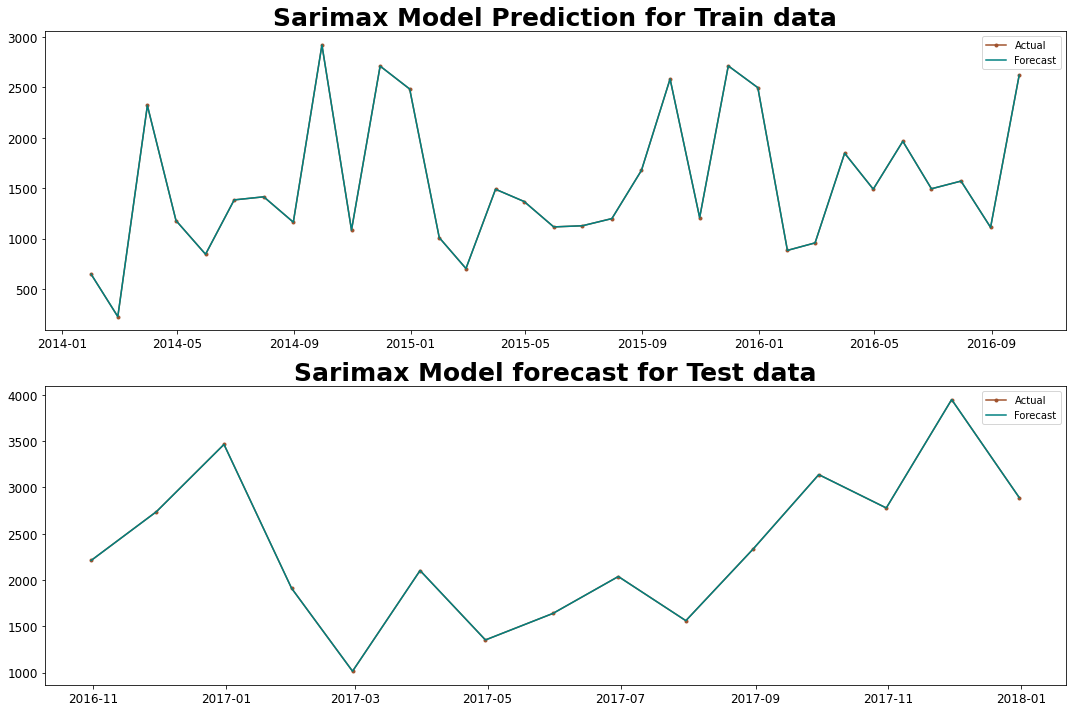

In [95]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.title('Sarimax Model Prediction for Train data',fontsize=25, fontweight='bold')
plt.plot(train,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarimax_predictions ,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.subplot(2,1,2)
plt.title('Sarimax Model forecast for Test data',fontsize=25,  fontweight='bold')
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(sarimax_forecast,color = 'teal' , label = 'Forecast' )
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation

In [96]:
sarimax_mse = mean_squared_error(sarimax_test['Sales'],sarimax_forecast)
sarimax_rmse = mean_squared_error(sarimax_test['Sales'],sarimax_forecast,squared=False)

sarimax_aic = sarimax_model.aic
sarimax_bic = sarimax_model.bic
print('\033[1;3mOVERVIEW OF OPTIMAL SARIMAX MODEL\033[0m')
print()
print('sarimax aic:',sarimax_aic)
print('sarimax bic:',sarimax_bic)

print('MSE :',sarimax_mse)
print('RMSE :',sarimax_rmse)

OVERVIEW OF OPTIMAL SARIMAX MODEL

sarimax aic: -673.8654949950422
sarimax bic: -657.403911818911
MSE : 2.503082999444318e-24
RMSE : 1.5821134597254137e-12


# MODEL COMPARISON

In [97]:
arma_forecasts = arma_model.forecast(len(test))

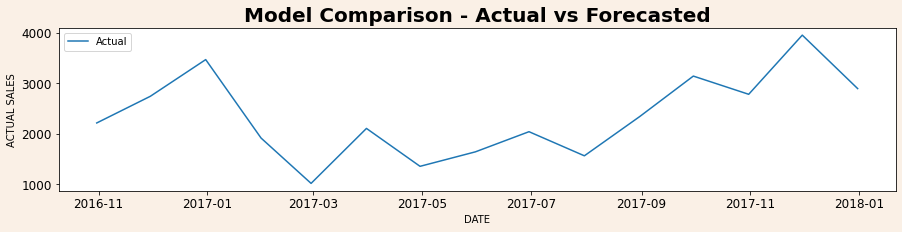

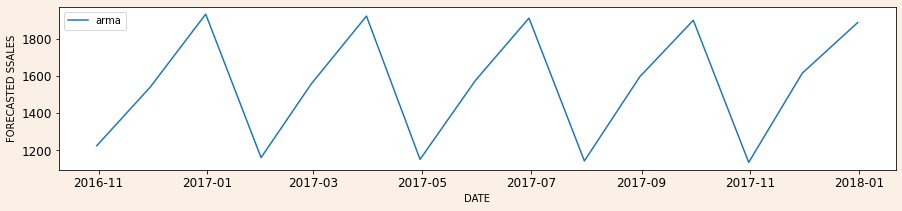

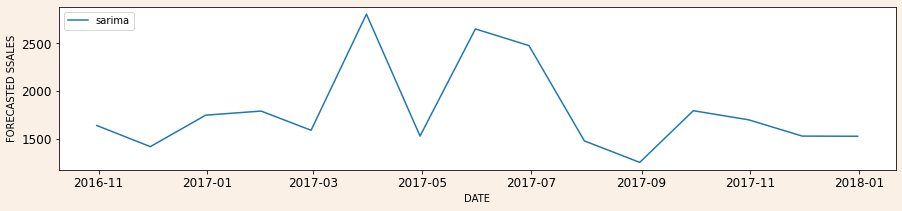

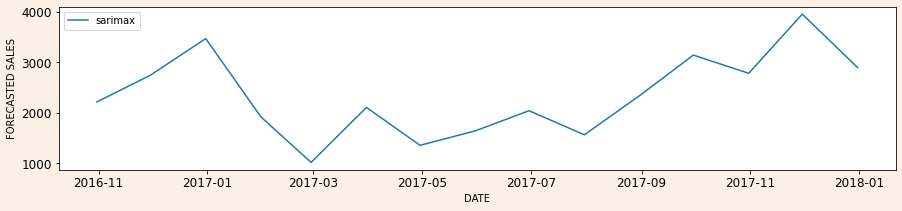

In [98]:
plt.subplots(figsize=(15,3),facecolor ='linen')
plt.title('Model Comparison - Actual vs Forecasted', fontweight='bold', size=20)
plt.plot(test, label='Actual')
plt.xlabel('DATE')
plt.ylabel('ACTUAL SALES')
plt.legend(loc='upper left')

plt.subplots(figsize=(15,3),facecolor ='linen')
plt.plot(arma_forecasts, label ='arma')
plt.xlabel('DATE')
plt.ylabel('FORECASTED SSALES')
plt.legend(loc='upper left')

plt.subplots(figsize=(15,3),facecolor ='linen')
plt.plot(sarima_forecasts, label ='sarima')
plt.xlabel('DATE')
plt.ylabel('FORECASTED SSALES')
plt.legend(loc='upper left')

plt.subplots(figsize=(15,3),facecolor ='linen')
plt.plot(sarimax_forecast, label='sarimax')
plt.xlabel('DATE')
plt.ylabel('FORECASTED SALES')
plt.legend(loc='upper left')
plt.show()


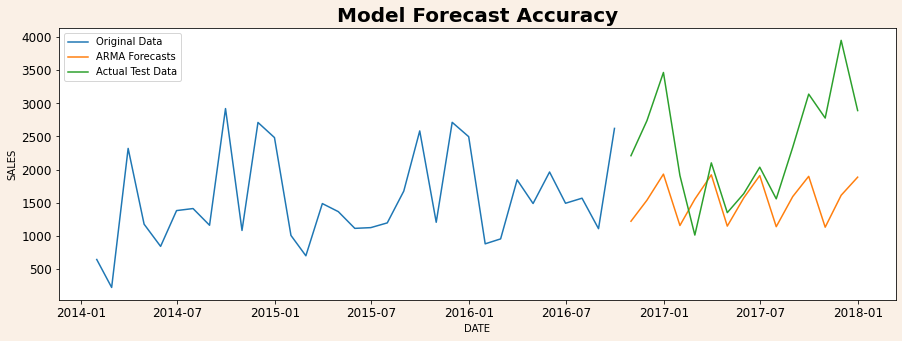

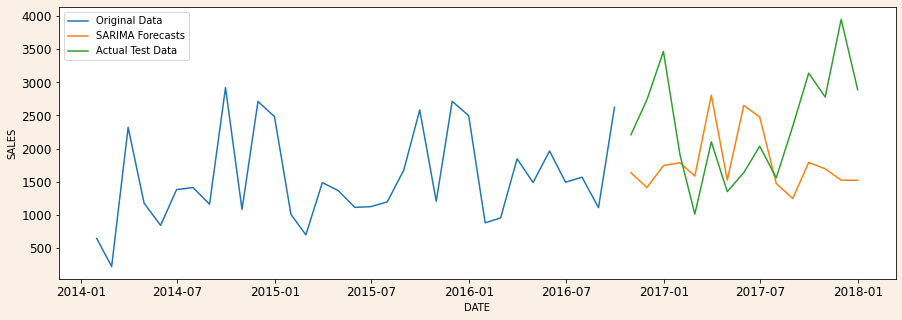

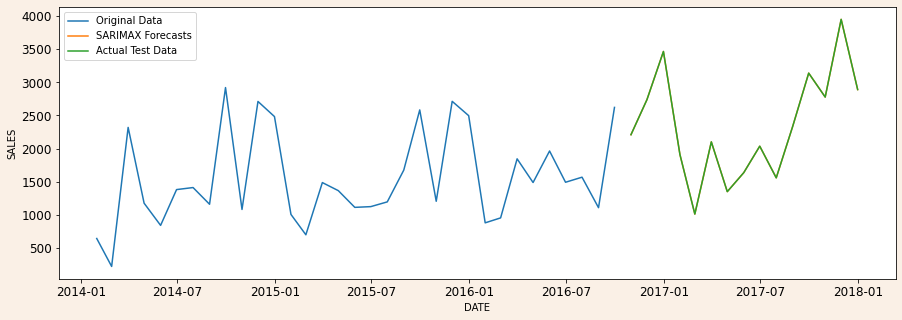

In [99]:
plt.subplots(figsize=(15,5),facecolor ='linen')
plt.title('Model Forecast Accuracy', fontweight='bold', size=20)

plt.plot(train, label='Original Data')
plt.plot(arma_forecasts, label='ARMA Forecasts')
plt.plot(test, label='Actual Test Data')
plt.xlabel('DATE')
plt.ylabel('SALES')
plt.legend(loc='upper left')

plt.subplots(figsize=(15,5),facecolor ='linen')
plt.plot(train, label='Original Data')
plt.plot(sarima_forecasts, label='SARIMA Forecasts')
plt.plot(test, label='Actual Test Data')
plt.xlabel('DATE')
plt.ylabel('SALES')
plt.legend(loc='upper left')

plt.subplots(figsize=(15,5),facecolor ='linen')
plt.plot(train, label='Original Data')
plt.plot(sarimax_forecast, label='SARIMAX Forecasts')
plt.plot(test, label='Actual Test Data')
plt.xlabel('DATE')
plt.ylabel('SALES')
plt.legend(loc='upper left')
plt.show()

In [100]:
final_scores = pd.DataFrame(index=['MSE', 'RMSE', 'AIC', 'BIC'], columns=['ARMA', 'SARIMA', 'SARIMAX'])

In [107]:
final_scores['ARMA'] = [arma_mse,arma_rmse,arma_model.aic, arma_model.bic]
final_scores['SARIMA'] = [mse_sarima, rmse_sarima, aic_sarima, bic_sarima]
final_scores['SARIMAX'] = [sarimax_mse, sarimax_rmse, sarimax_model.aic, sarimax_model.bic]

In [111]:
final_scores = final_scores.transpose()

In [112]:
final_scores

MSE          RMSE         AIC         BIC
ARMA     3.984976e+05  6.312667e+02  533.538781  544.014334
SARIMA   1.268556e+06  1.126302e+03  543.766988  555.739048
SARIMAX  2.503083e-24  1.582113e-12 -673.865495 -657.403912

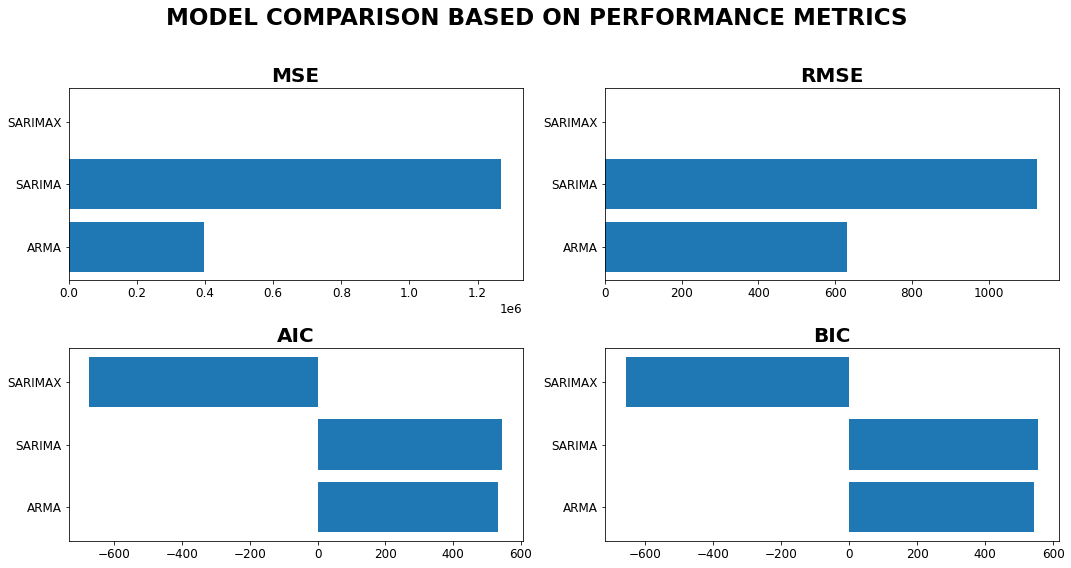

In [113]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
plt.suptitle('MODEL COMPARISON BASED ON PERFORMANCE METRICS\n',  fontweight='bold', size=23)
ax1.barh(width = final_scores['MSE'], y=final_scores.index)
ax1.set_title('MSE', fontweight='bold', size=20)

ax2.barh(width = final_scores['RMSE'], y=final_scores.index)
ax2.set_title('RMSE', fontweight='bold', size=20)

ax3.barh(width = final_scores['AIC'], y=final_scores.index)
ax3.set_title('AIC', fontweight='bold', size=20)

ax4.barh(width = final_scores['BIC'], y=final_scores.index)
ax4.set_title('BIC', fontweight='bold', size=20)

plt.tight_layout()

# RANDOMLY GENERATING EXOG VALUES

In [149]:
df_sales_m.agg(['min', 'max'])

min     225.994600
max    3948.260833
Name: Sales, dtype: float64

In [150]:
import random

qty = []

for i in range(1,49):
    x = random.uniform(0,23)
    qty.append(x)

len(qty)

48

In [151]:
df_sales_m.shape

(48,)

In [152]:
import random

qty = []

for i in range(1,49):
    x = random.uniform(1,15)
    qty.append(x)
    
len(qty)

48

In [153]:
disc = []

for i in range(1,49):
    x = random.uniform(0,0.7)
    disc.append(x)

len(disc)

48

In [154]:
profit = []

for i in range(1,49):
    x = random.uniform(-1862.3124, 1013.1270)
    profit.append(x)

len(profit)

48

In [155]:
exog_random = pd.DataFrame()

exog_random['future_quantity'] = qty
exog_random['future_discount'] = disc
exog_random['future_profit'] = profit

In [156]:
exog_random

future_quantity  future_discount  future_profit
0          6.349725         0.662215    -294.045171
1          8.475846         0.627562   -1696.850482
2          3.496840         0.205177   -1713.738141
3          8.902068         0.573748   -1754.870286
4          9.735328         0.672840     472.249692
5         13.012921         0.086043     -24.579411
6          5.065537         0.205532    -340.142459
7          1.552732         0.244405    -191.464279
8          3.447943         0.364643   -1138.558394
9          3.692965         0.286874     364.520774
10         7.131656         0.212057    -790.966569
11         7.080843         0.310467    -979.463603
12         8.318853         0.219549   -1605.923504
13         9.487701         0.587869     938.532738
14         7.889101         0.030372   -1458.395171
15        13.907622         0.198951   -1201.331097
16        11.573496         0.490460    -244.885982
17        13.797873         0.491192   -1312.529709
18         4.102319         0.560762     168.586181
19        13.024083         0.368005      12.958352
20         3.851616         0.477525    -181.118427
21         4.787701         0.477414     632.763895
22         9.019279         0.636326    -155.464512
23         3.340578         0.548323    -146.623567
24        13.692354         0.122611     932.123140
25         3.025811         0.363048     972.187200
26        11.403276         0.498964   -1743.919447
27         9.194686         0.642788       5.033206
28        12.201396         0.312643     279.303300
29         3.955205         0.334202     345.915076
30        11.725805         0.183762   -1357.976878
31        11.137919         0.658828   -1205.627694
32        13.010648         0.109444     756.387910
33         6.592620         0.252194    -923.900470
34         8.630433         0.329974   -1187.326457
35         3.822059         0.138845     687.801519
36         2.691914         0.205666    -888.691023
37         6.459558         0.150114     108.641896
38         2.044691         0.373736     658.394317
39         6.527872         0.325889   -1244.111025
40        11.872270         0.308929    -482.953230
41         6.972751         0.670760   -1804.209115
42         2.654385         0.358041      71.179352
43        14.681978         0.459540   -1272.964968
44         4.440280         0.566657   -1289.454427
45         8.761490         0.157640   -1617.770281
46         4.216362         0.505218      50.411353
47         7.585181         0.499428    -327.778035

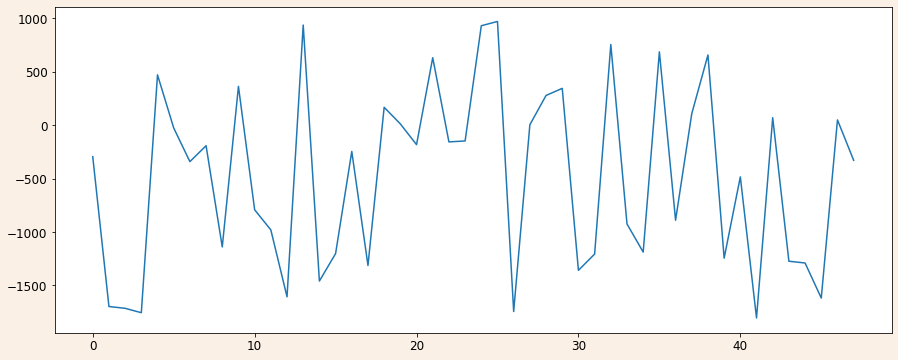

In [158]:
plt.figure(figsize=(15,6), facecolor='linen')
plt.plot(exog_random.future_profit)
plt.show()

In [159]:
forecast_model = SARIMAX(df_sales_m,order=(3,0,4),seasonal_order=(3,0,4,30),exog= exog_random.values).fit()

In [164]:
sarimax_forecast1 = forecast_model.forecast(48, exog=exog_random.values[:48])

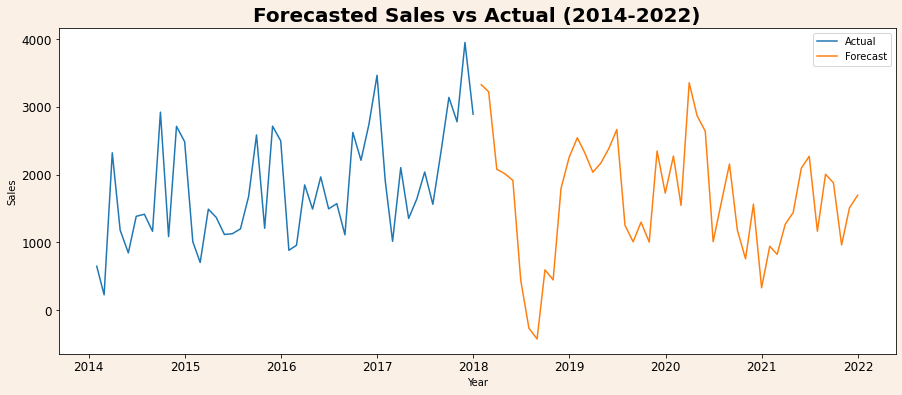

In [166]:
plt.figure(figsize=(15,6), facecolor='linen')
plt.title('Forecasted Sales vs Actual (2014-2022)', fontweight='bold', size=20)
plt.plot(df_sales_m, label = 'Actual')
plt.plot(sarimax_forecast1, label = 'Forecast')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

---
# Model Evaluation

As the model is stationary, we eliminate the ARIMA model from the evaluation.

As RMSE is a better measure of model fit than MSE, we could give RMSE score more weight in model evaluation. 

1. ARMA model does not do justice to our actual data as its forcast fails to capture the trend or seasonality of our data. 
2. SARIMA model is an improvement over the ARMA as it accurately captures the seasonality component, yet it cannot capture trend.
3. SARIMAX model captures the trend and seasonality of our time series data very well.


In conclusion, the **SARIMAX model** is the optimal model that can be used by the client to predict their future sales. 


---
# Business Conclusion

My model’s sales forecast implies that the furniture company will face dips and rises throughout the next 4 years. The marketing must place highest attention in mid-2019 as the forecasts suggest the greatest fall in sales during this period. 

There is a seasonality in our dataset that shows that a low sales period will usually follow a higher sales period in a repeated fashion. The start and end of years seem to be the highest sale generating times of a year. 

The furniture company can maximize their sales during this time by providing customers with offers and discounts on the highest demand categories (office-supplies)

The furniture company can drive higher sales in the winter by providing customers with offers and discounts on the highest demand categories (office-supplies)

The furniture company should focus on increasing the quantity they sell, as my study shows higher sales are made when higher quantities are sold. This should be implemented after ensuring proper inventory management and stock control methods are in place.


---